In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy_financial as npf

In [2]:
from dca_simulator.data_loader import load_price_data
from dca_simulator.data_processing import data_process
from dca_simulator.strategies import dca_DD, dca_standard, lump_sum, dca_sma, value_averaging
from dca_simulator.backtest import perf_backtest
from dca_simulator.metrics import compute_KeyMetrics
from dca_simulator.plots import plot_profit_loss, plot_portf_value, plot_shares_total, plot_monthly_investment, plot_invested_total

In [3]:
#df = load_price_data("AAPL", "2000-01-01", "2025-01-01")
#df.to_csv("AAPL_2000_2025.csv")

In [4]:
raw = pd.read_csv("AAPL_2000_2025.csv", index_col = "Date", parse_dates=True)

In [ ]:
clean = data_process(raw)

,Close
Date,
2000-01-03,0.839281
2000-01-04,0.768521
2000-01-05,0.779767
2000-01-06,0.712287
2000-01-07,0.746027


In [19]:
dd_dca_strat = perf_backtest(clean, dca_DD, monthly_contrib=150)
dd_dca_strat.tail()


,Close,12m_high,drawdown,DD_cond,shares_total,invested_total,portf_value,profit_loss
Date,,,,,,,,
2024-08-01,216.886902,233.235901,0.929904,False,47021.820459,57150.0,1.019842e+07,1.014127e+07
2024-09-01,221.523300,233.235901,0.949782,False,47022.497588,57300.0,1.041658e+07,1.035928e+07
2024-10-01,224.944031,233.235901,0.964449,False,47023.164421,57450.0,1.057758e+07,1.052013e+07
2024-11-01,221.662491,235.156555,0.942617,False,47023.841125,57600.0,1.042342e+07,1.036582e+07
2024-12-01,238.511276,238.511276,1.000000,False,47024.470026,57750.0,1.121587e+07,1.115812e+07


In [20]:
dca_strat = perf_backtest(clean, dca_standard, monthly_contrib=150)
dca_strat.tail()

,Close,shares_total,invested_total,portf_value,profit_loss
Date,,,,,
2024-08-01,216.886902,31239.033470,44400.0,6.775337e+06,6.730937e+06
2024-09-01,221.523300,31239.710600,44550.0,6.920324e+06,6.875774e+06
2024-10-01,224.944031,31240.377432,44700.0,7.027336e+06,6.982636e+06
2024-11-01,221.662491,31241.054137,44850.0,6.924970e+06,6.880120e+06
2024-12-01,238.511276,31241.683038,45000.0,7.451494e+06,7.406494e+06


In [21]:
lump_sum_strat = perf_backtest(clean, lump_sum, monthly_contrib=150)
lump_sum_strat.tail()

,Close,shares_total,invested_total,portf_value,profit_loss
Date,,,,,
2024-08-01,216.886902,53617.351468,45000,1.162890e+07,1.158390e+07
2024-09-01,221.523300,53617.351468,45000,1.187749e+07,1.183249e+07
2024-10-01,224.944031,53617.351468,45000,1.206090e+07,1.201590e+07
2024-11-01,221.662491,53617.351468,45000,1.188496e+07,1.183996e+07
2024-12-01,238.511276,53617.351468,45000,1.278834e+07,1.274334e+07


In [22]:
sma_dca_strat = perf_backtest(clean, dca_sma, monthly_contrib = 150)
sma_dca_strat.tail()

,Close,sma,above_sma,shares_total,invested_total,portf_value,profit_loss
Date,,,,,,,
2024-08-01,216.886902,187.748109,True,14624.455346,31650.0,3.171853e+06,3.140203e+06
2024-09-01,221.523300,192.775274,True,14625.132475,31800.0,3.239808e+06,3.208008e+06
2024-10-01,224.944031,196.059581,True,14625.799308,31950.0,3.289986e+06,3.258036e+06
2024-11-01,221.662491,200.754275,True,14626.476012,32100.0,3.242141e+06,3.210041e+06
2024-12-01,238.511276,204.770139,True,14627.104913,32250.0,3.488729e+06,3.456479e+06


In [23]:
va_strat = perf_backtest(clean, value_averaging, monthly_contrib = 150, goal_monthly_growth = 0.035)
va_strat.tail()

,Close,shares_total,invested_total,portf_value,profit_loss
Date,,,,,
2024-08-01,216.886902,20584.712885,1.703231e+06,4.464555e+06,2.761324e+06
2024-09-01,221.523300,20584.712885,1.703231e+06,4.559994e+06,2.856763e+06
2024-10-01,224.944031,20584.712885,1.703231e+06,4.630408e+06,2.927177e+06
2024-11-01,221.662491,20584.712885,1.703231e+06,4.562859e+06,2.859628e+06
2024-12-01,238.511276,20584.712885,1.703231e+06,4.909686e+06,3.206455e+06


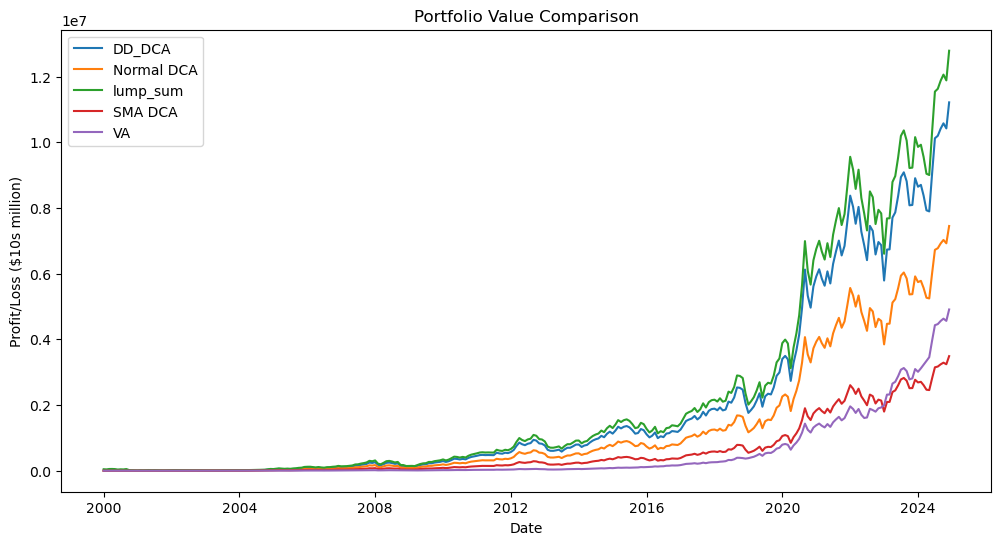

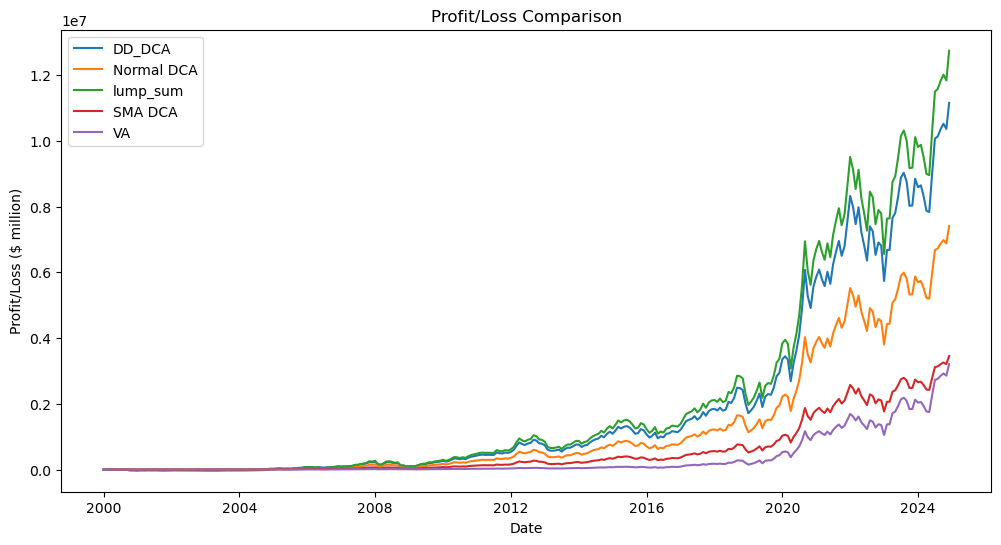

In [24]:
plot_portf_value(dd_dca_strat, dca_strat, lump_sum_strat, sma_dca_strat, va_strat, labels = ["DD_DCA", "Normal DCA", "lump_sum", "SMA DCA", "VA"]) ###where is the DD_DCA?
plot_profit_loss(dd_dca_strat, dca_strat, lump_sum_strat, sma_dca_strat, va_strat, labels = ["DD_DCA", "Normal DCA", "lump_sum", "SMA DCA", "VA"])

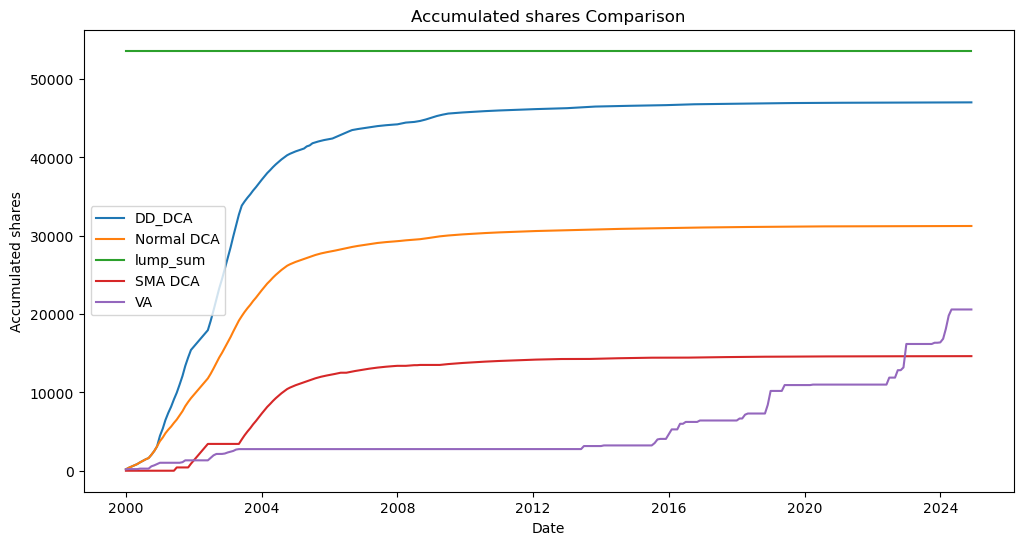

In [25]:
plot_shares_total(dd_dca_strat, dca_strat, lump_sum_strat, sma_dca_strat, va_strat, labels = ["DD_DCA", "Normal DCA", "lump_sum", "SMA DCA", "VA"])

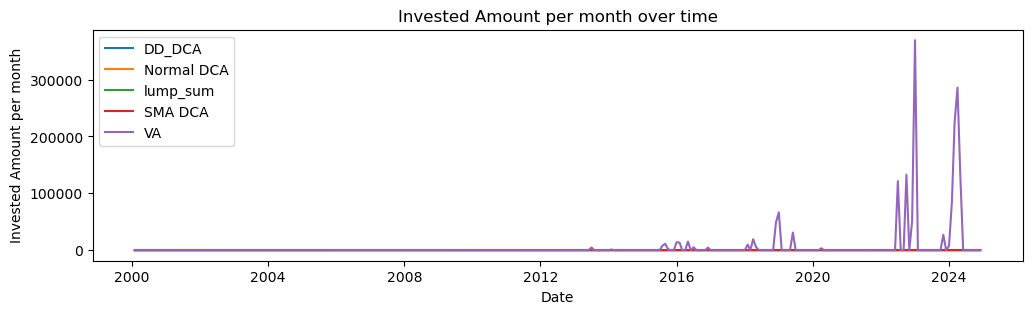

In [26]:
plot_monthly_investment(dd_dca_strat, dca_strat, lump_sum_strat, sma_dca_strat, va_strat, labels = ["DD_DCA", "Normal DCA", "lump_sum", "SMA DCA", "VA"])

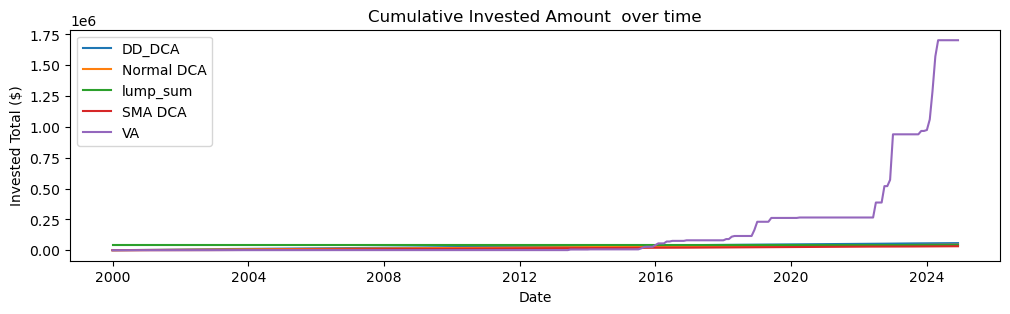

In [27]:
plot_invested_total(dd_dca_strat, dca_strat, lump_sum_strat, sma_dca_strat, va_strat, labels = ["DD_DCA", "Normal DCA", "lump_sum", "SMA DCA", "VA"])

In [33]:
compute_KeyMetrics(dd_dca_strat)

{'Total Invested': '$57,750.00',
 'Final Value': '$11,215,866.36',
 'ROI': '19,321.41%',
 'IRR': '620,468.08%',
 'CAGR': '23.53%',
 'Max Drawdown': '-53.78%',
 'Calmar Ratio': np.float64(0.44),
 'Years': 24.9}